# ADP 회귀분석

***

## 1. 선형회귀분석 가정

1. 선형성 = 독립 및 종속변수의 관계가 선형이다.(가장 중요한 가정)
2. 등분산성 = 오차의 분산이 일정하다.
3. 독립성 = 독립변수와 오차는 관련이 없다. dubin-watson 통계량 사용
4. 비상관성 = 오차들끼리 상관이 없다.
5. 정상성(정규성) = 오차의 분포가 정규분포를 따른다. Q-Q plot, Kolmogolov-Smirnov 검정, shpiro-Wilk검정 등 활용

In [1]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

from sklearn.datasets import load_boston

In [2]:
boston = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
boston['target'] = load_boston().target

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. 단순 선형 회귀 분석

In [4]:
model = ols(formula = 'target ~ LSTAT', data = boston)

In [5]:
result = model.fit()

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        08:57:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 추정된 회귀식은 target = 34.5538 - 0.95 * LSTAT
#### 모형의 결정계수는 0.544이며 수정된 결정계수는 0.543이다.
#### 모형의 F-통계량은 601.6이고 모형의 유의확률은 5.08e-88이다.

## 3. 다중선형회귀분석

In [7]:
fifa = pd.read_csv('/Users/kisehyun/study_code/ADP/모의고사 1회/FIFA.csv', encoding = 'cp949')

In [8]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [9]:
model = ols(formula = 'Value ~ Wage + Overall + Age', data = fifa)

In [10]:
result = model.fit()

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 2.096e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        08:57:21   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16638   BIC:                         3.092e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.018e+04    228.843    -44.466      0.000   -1.06e+04   -9727.191
Wage         184.1522      1.128    163.265      0.000     181.941     186.363
Overall      241.4204      4.002     60.318      0.000     233.575     249.266
Age         -203.1997      4.925    -41.261      0.000    -212.853    -193.547
==============================================================================
Omnibus:                    17093.962   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3530710.483
Skew:                           4.667   Prob(JB):                         0.00
Kurtosis:                      73.743   Cond. No.                         813.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. 최적회귀방정식

- 전진이든 후진이든 자동화 구성 말고 일일이 하는게 더 편할듯

In [14]:
data = pd.read_csv('/Users/kisehyun/study_code/ADP/모의고사 4회/bike_marketing.csv', encoding = 'cp949')

In [15]:
data.head()

,company_num,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
0,1,65.66,47.86,52.46,166,39.26,5,High
1,2,39.10,55.20,77.40,172,38.90,7,Medium
2,3,174.81,52.01,68.01,295,49.51,11,Medium
3,4,34.36,61.96,86.86,183,40.56,7,High
4,5,78.21,40.91,30.41,150,40.21,9,Low


In [16]:
X = data[['google_adwords', 'facebook', 'twitter', 'marketing_total', 'employees']]
y = data.revenues

In [17]:
model = ols('revenues ~ google_adwords + facebook + twitter + marketing_total + employees', data = data)

In [18]:
result = model.fit()

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenues   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.57e-72
Time:                        08:57:21   Log-Likelihood:                -369.26
No. Observations:                 172   AIC:                             750.5
Df Residuals:                     166   BIC:                             769.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.4433      0.596     47.706      0.000      27.266      29.621
google_adwords      1.2110      0.571      2.122      0.035       0.084       2.338
facebook            1.3464      0.571      2.356      0.020       0.218       2.474
twitter             1.1724      0.571      2.052      0.042       0.045       2.300
marketing_total    -1.1696      0.571     -2.049      0.042      -2.297      -0.043
employees           0.3865      0.104      3.708      0.000       0.181       0.592
==============================================================================
Omnibus:                        3.945   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.974
Skew:                          -0.341   Prob(JB):                        0.137
Kurtosis:                       2.702   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 회귀모형은 revenues = 28.4433 + 1.211 * google_adwords + 1.3464 * facebook + 1.1724 * twitter - 1.1696 * marketing_total + 0.3865 * employees이다. 모형의 설명력은 87.3%이며 수정된 결정계수는 87%이다. 

In [20]:
import statsmodels.api as sm

In [21]:
data['constant'] = 1
y = data['revenues']

### 1) 전진선택법

In [22]:
add_feature = ['constant']
aic_list = []
target_cols = ['google_adwords', 'facebook', 'twitter','marketing_total', 'employees']
i = 0
while True :
    i += 1
    print(f'\n{i}번째 탐색')
    if i == 1 :
        
        before_model = sm.OLS(y, data[['constant']]).fit()
        before_aic = before_model.aic
        for c in target_cols :
            after_model = sm.OLS(y, data[add_feature + [c]]).fit()
            after_aic = after_model.aic
            print(f'{c} 추가 되었을 때 AIC는 {round(after_aic, 4)}이다.')
            aic_list.append(after_aic)
        print(f'추가될 변수는 {target_cols[np.argmin(aic_list)]}')
        add_feature.append(target_cols[np.argmin(aic_list)])
        del target_cols[np.argmin(aic_list)]
        
    elif i != 1 :
        a = []
        for c in target_cols :
            before_model = sm.OLS(y, data[add_feature]).fit()
            before_aic = before_model.aic
            after_model = sm.OLS(y, data[add_feature + [c]]).fit()
            after_aic = after_model.aic
            print(f'{c} 추가 전은 {round(before_aic, 4)}이고 {c}추가 되었을 때 AIC는 {round(after_aic, 4)}')
            a.append(after_aic)
            
        try :
            if before_aic > np.min(a):
                print(f'추가될 feature는 {target_cols[np.argmin(a)]}')
                add_feature.append(target_cols[np.argmin(a)])
                del target_cols[np.argmin(a)]
            else :
                break
        except :
            break
print('*' * 100)
print(f'최종 선택 변수들은 {add_feature}이다.')


1번째 탐색
google_adwords 추가 되었을 때 AIC는 945.7577이다.
facebook 추가 되었을 때 AIC는 1028.0336이다.
twitter 추가 되었을 때 AIC는 1084.9262이다.
marketing_total 추가 되었을 때 AIC는 874.4012이다.
employees 추가 되었을 때 AIC는 946.1149이다.
추가될 변수는 marketing_total

2번째 탐색
google_adwords 추가 전은 874.4012이고 google_adwords추가 되었을 때 AIC는 865.4032
facebook 추가 전은 874.4012이고 facebook추가 되었을 때 AIC는 789.0997
twitter 추가 전은 874.4012이고 twitter추가 되었을 때 AIC는 874.4768
employees 추가 전은 874.4012이고 employees추가 되었을 때 AIC는 843.5429
추가될 feature는 facebook

3번째 탐색
google_adwords 추가 전은 789.0997이고 google_adwords추가 되었을 때 AIC는 765.5685
twitter 추가 전은 789.0997이고 twitter추가 되었을 때 AIC는 765.9213
employees 추가 전은 789.0997이고 employees추가 되었을 때 AIC는 772.4698
추가될 feature는 google_adwords

4번째 탐색
twitter 추가 전은 765.5685이고 twitter추가 되었을 때 AIC는 762.2059
employees 추가 전은 765.5685이고 employees추가 되었을 때 AIC는 752.8256
추가될 feature는 employees

5번째 탐색
twitter 추가 전은 752.8256이고 twitter추가 되었을 때 AIC는 750.5159
추가될 feature는 twitter

6번째 탐색
****************************************************

In [23]:
model = sm.OLS(y, data[add_feature]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenues   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           1.57e-72
Time:                        08:57:21   Log-Likelihood:                -369.26
No. Observations:                 172   AIC:                             750.5
Df Residuals:                     166   BIC:                             769.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant           28.4433      0.596     47.706      0.000      27.266      29.621
marketing_total    -1.1696      0.571     -2.049      0.042      -2.297      -0.043
facebook            1.3464      0.571      2.356      0.020       0.218       2.474
google_adwords      1.2110      0.571      2.122      0.035       0.084       2.338
employees           0.3865      0.104      3.708      0.000       0.181       0.592
twitter             1.1724      0.571      2.052      0.042       0.045       2.300
==============================================================================
Omnibus:                        3.945   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.974
Skew:                          -0.341   Prob(JB):                        0.137
Kurtosis:                       2.702   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 처음에 marketing_total 변수가 추가되었을 때 AIC 값이 874.4로 가장 작아지므로 다음 단계에 marketing_total 변수를 모형에 추가하였다. 다음 단계에서는 facebook 변수가 추가 되었을 때 AIC 값이 789.09로 가장 낮아지는 것을 알 수 있다.
#### 이러한 단계들을 거쳐 최종적으로 marketing_total, facebook, google_adwords, employees, twitter 변수가 선택되었다.
#### 최종 회귀식은 y = 28.443 + 1.3464 * facebook + 1.1724 * twitter + 0.3865 * employees + 1.211 * google_adwords - 1.1696 * marketing_total이며 변수선택을 하지 않았을 때와 동일한 결과를 보인다.
#### 결정계수 값은 0.873이고 수정된 결정계수는 0.870이다. 또한 모든 변수들의 p-value가 유의수준 0.05보다 작기 때문에 통계적으로 모두 유의하다고 볼 수 있다.
#### 모델의 통계적유의성을 띄는 F통계량이 매우 크며 p-value도 0에 수렴하기 때문에 통계적으로 유의한 모델이라고 볼 수 있다.

### 2) 후진제거법

In [24]:
features = boston.columns[:-1].tolist()
y = boston.target

In [26]:
base_model = sm.OLS(y, sm.add_constant(boston[features])).fit()
base_aic = base_model.aic
print(f'초기 aic는 {round(base_aic, 4)}')

초기 aic는 3025.6086


## 5. 고급회귀분석

#### 정규화 선형회귀
1. 릿지 : 가중치들의 제곱합 최소화, L2규제, 가중치를 0에 근사하게 만든다.

2. 라쏘 : 가중치 절대값의 합 최소화, L1규제, 가중치를 0으로 만든다.

3. 엘라스틱넷 : 라쏘 & 릿지 절충

In [36]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [37]:
X_train, X_test, y_train, y_test = train_test_split(load_boston().data, load_boston().target, test_size = .2, random_state = 324)

In [38]:
lasso = Lasso()
ridge = Ridge()
els = ElasticNet()

In [39]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
els.fit(X_train, y_train)

ElasticNet()

In [40]:
print(mean_squared_error(y_test, ridge.predict(X_test)))
print(mean_squared_error(y_test, lasso.predict(X_test)))
print(mean_squared_error(y_test, els.predict(X_test)))

17.643274769982035
24.38322596156784
23.716094920112916


***
## 6. 일반화 선형회귀(GLM)

#### 종속변수가 범주형이거나 정규성을 만족하지 못하는 경우 적절한 함수로 종속변수를 변환하여 f(x)를 정의한 후 이 f(x)와 독립변수를 선형 결합으로 모형화한다.

- 포아송 : 일정한 시간 또는 공간 내에서 발생하는 사건의 발생횟수에 따른 확률분포

예시> 5페이지당 오타 10개, 오타 3개 나올 확률은? = 2.718281 ^ (-평균오타수) * 2(평균오타수) ^ 3(오타수) / 3(오타수)!

In [118]:
import statsmodels.formula.api as smf

In [112]:
num = 1000
lam  = 5
y = np.random.poisson(lam,num)

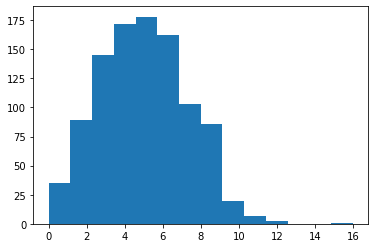

In [114]:
plt.hist(y,14,density = False)
plt.show()

In [115]:
x = range(len(y))
df = pd.DataFrame({'x':x, 'y':y})

In [119]:
glm_model = 'y ~ x'
result = smf.glm(formula=glm_model, data=df, family=sm.families.Poisson(link=sm.families.links.log)).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2178.3
Date:                Thu, 25 Mar 2021   Deviance:                       1001.5
Time:                        10:46:08   Pearson chi2:                     955.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6187      0.028     57.260      0.0

In [120]:
b0,b1 = result.params
print('exp(b0) = {}'.format(np.exp(b0)))
print('Mean of y = {}'.format(df.y.mean()))

exp(b0) = 5.046639637887927
Mean of y = 4.949


#### 로지스틱 회귀분석

In [132]:
from sklearn.datasets import load_breast_cancer

In [133]:
log_data =pd.DataFrame(load_breast_cancer().data, columns = load_breast_cancer().feature_names)

In [136]:
log_data['target'] = load_breast_cancer().target

In [153]:
log_data.columns = [x.split(' ')[0] + "_" + x.split(' ')[-1] for x in log_data.columns]

In [161]:
glm = smf.glm(formula = 'target_target ~ mean_radius+ mean_perimeter+ mean_area+ mean_concavity + mean_points+ worst_radius+ worst_perimeter+ worst_area + worst_concavity+ worst_points'
              , data = log_data, family = sm.families.Binomial(link = sm.families.links.logit)).fit()

In [162]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          target_target   No. Observations:                  569
Model:                            GLM   Df Residuals:                      558
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.847
Date:                Thu, 25 Mar 2021   Deviance:                       111.69
Time:                        11:09:57   Pearson chi2:                 2.08e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.6541     11.530     -0.751      0.453     -31.253      13.945
mean_radius         1.7733      4.032      0.440      0.660      -6.129       9.676
mean_perimeter      0.1779      0.420      0.424      0.672      -0.645       1.001
mean_area          -0.0133      0.028     -0.482      0.630      -0.068       0.041
mean_concavity     13.5051     12.876      1.049      0.294     -11.731      38.741
mean_points       -97.5329     38.366     -2.542      0.011    -172.728     -22.337
worst_radius        0.4089      1.558      0.263      0.793      -2.644       3.462
worst_perimeter    -0.0220      0.103     -0.215      0.830      -0.223       0.179
worst_area         -0.0274      0.016     -1.725      0.085      -0.058       0.004
worst_concavity    -4.4451      3.740     -1.189      0.235     -11.775       2.885
worst_points      -12.2384     15.761     -0.776      0.437     -43.129      18.653
===================================================================================
"""

In [164]:
np.exp(glm.params)

Intercept          1.744076e-04
mean_radius        5.890243e+00
mean_perimeter     1.194707e+00
mean_area          9.867572e-01
mean_concavity     7.331602e+05
mean_points        4.385431e-43
worst_radius       1.505227e+00
worst_perimeter    9.782387e-01
worst_area         9.730107e-01
worst_concavity    1.173645e-02
worst_points       4.841171e-06
dtype: float64

In [192]:
tt = pd.read_csv('/Users/kisehyun/study_code/ADP/모의고사 2회/titanic.csv', encoding = 'cp949')

In [193]:
tt = tt[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',  'survived']].dropna(how = 'any')

In [194]:
tt['sex'] = tt.sex.map({'female' : 1, 'male' : 0})

In [195]:
X_train, X_test, y_train, y_test = train_test_split(tt.iloc[:, :-1], tt.survived, test_size = .2, random_state = 325, stratify = tt.survived)

In [197]:
logistic_model = sm.Logit(y_train,X_train)
logistic_result = logistic_model.fit(method = 'newton') ## 뉴턴방법 적용

Optimization terminated successfully.
         Current function value: 0.459057
         Iterations 6


In [198]:
print(logistic_result.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  836
Model:                          Logit   Df Residuals:                      830
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Mar 2021   Pseudo R-squ.:                  0.3214
Time:                        11:20:05   Log-Likelihood:                -383.77
converged:                       True   LL-Null:                       -565.58
Covariance Type:            nonrobust   LLR p-value:                 2.056e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pclass        -0.5848      0.074     -7.855      0.000      -0.731      -0.439
sex            2.7380      0.191     14.328      0.000       2.363       3.113
age           -0.0144      0.005     -2.836      0.0

In [199]:
np.exp(logistic_result.params)

pclass     0.557220
sex       15.456512
age        0.985699
sibsp      0.766580
parch      1.019963
fare       1.006900
dtype: float64

#### 여성이 남성보다 생존확률이 15.45배 높다.
#### 나이가 많을수록 생존활률이 0.98배 감소한다.
***
#### VIF(분산팽창요인) : 4 보다 크면 다중공선성 존재한다고 할 수 있으며 10 이상이면 심각한 문제가 있는 것으로 해석.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
variance_inflation_factor(model.exog, 1)

1.5320185825165729

두번째 변수는 VIF지수가 1.53이다

## 7. 회귀모형 진단

1. Residuals & Fitted Values(정규성)
2. Q-Q Plot(정규성)
3. Scale-Location(등분산성)
4. Residuals & Leverage(영향력 진단)
5. Cook's distance(영향력 진단)
6. 기타(DFBETAS, DFFITS)

In [28]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1) 오차항의 독립성 가정 -  더빈 왓슨 검정(2에 가까울 수록 만족 / 오차항이 자기 상관이 없음) / 0에 가까우면 양의 상관관계 / 4에 가까우면 음의 상관관계

In [29]:
durbin_watson(model.resid)

2.111378372860817

***
### 2) 정규성 가정 - shapiro / H0 : 데이터는 정규분포를 따른다. / H1 : 정규분포를 따르지 않는다.

In [30]:
shapiro = shapiro(model.resid)
print(f'shapiro 검정결과 검정 값은 {np.round(shapiro[0],4)}이고 p-value는 {np.round(shapiro[1], 4)}이다.')

shapiro 검정결과 검정 값은 0.9866이고 p-value는 0.0991이다.


#### 귀무가설을 채택하고 정규분포를 따른다고 할 수 있다.
***
### 3) 등분상성 & 정규성 가정 만족 여부 그래프

#### 3-1) Residuals & Fitted Values(정규성)

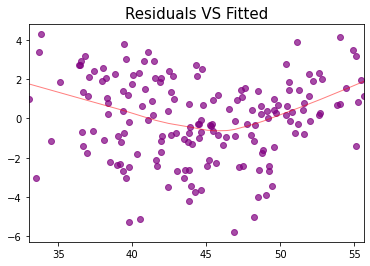

In [31]:
plt.scatter(model.fittedvalues, model.resid, color = 'purple', alpha = .7)
sns.regplot(model.fittedvalues, model.resid,
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.5});
plt.title('Residuals VS Fitted', size = 15)
plt.show()

잔차가 평균인 0을 중심으로 고르게 퍼져있는 것을 알 수 있지만 포물선을 그리고 있기 때문에 정규성을 만족한다고 보기 어렵다.
***
#### 3-2) Q-Q Plot(정규성)

In [32]:
from scipy.stats import probplot

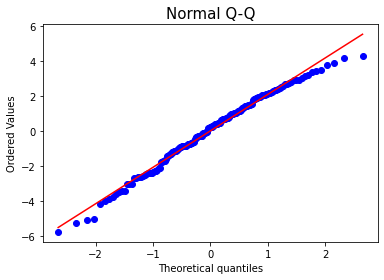

In [33]:
probplot(model.resid, plot = plt)
plt.title('Normal Q-Q', size = 15)
plt.show()

정규성을 만족한다고 할 수 있다.
***
#### 3-3) Scale-Location(등분산성)

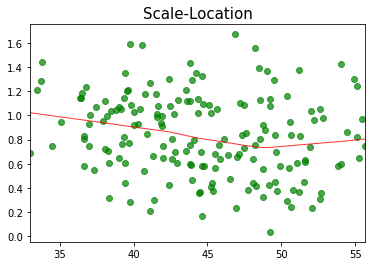

In [34]:
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.get_influence().resid_studentized_internal)), color = 'green', alpha = .7)
sns.regplot(model.fittedvalues, np.sqrt(np.abs(model.get_influence().resid_studentized_internal)),
          scatter=False,
          ci=False,
          lowess=True,
          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.title('Scale-Location', size = 15)
plt.show()

빨간선의 기울기가 0에 가까워야 하지만 Fitted Values가 커질수록 기울기가 변화하고 있다. 이처럼 빨간선의 기울기가 0에서 떨어진 저밍 있다면 해당 점에서는 표준화 잔차가 큼을 의미하고 회귀직선이 y값을 잘 적합하지 못함을 의미한다. 또한 해당 점들은 이상치일 가능성이 있다.
***
#### 3-4) Residuals & Leverage(영향력 진단)

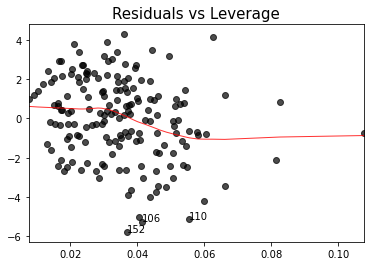

In [35]:
plt.scatter(model.get_influence().hat_matrix_diag, model.resid, color = 'black', alpha = .7)
sns.regplot(model.get_influence().hat_matrix_diag, model.resid,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
leverage_top_3 = np.flip(np.argsort(model.get_influence().cooks_distance[0]), 0)[:3]
for i in leverage_top_3:
    plt.annotate(i, xy=(model.get_influence().hat_matrix_diag[i],
                                 model.resid[i]));
plt.title('Residuals vs Leverage', size = 15)
plt.show()

쿡의 거리가 0.5 이상이면 빨간 점선으로 표현되고 점선 바깥에 있는 점들은 무시할 수 없을 정도로 예측치를 벗어난 관측값이다. 본 그래프에서는 그런 점들은 보이지 않기 때문에 회귀직선에 크게 영향을 끼치는 점들은 드물다고 볼 수 있다.

#### 3-5) Cook's Distance

- 각각의 값이 얼마나 많이 회귀 모델을 변화시키는지 확인하는 것. 
- 1이상일 경우 매우 큰 영향치로 간주.

In [41]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [108]:
CD, _ = OLSInfluence(result).cooks_distance
CD.reset_index(name = 'score').head()

,index,score
0,0,0.007070
1,1,0.024714
2,2,0.000176
3,3,0.033372
4,4,0.005566


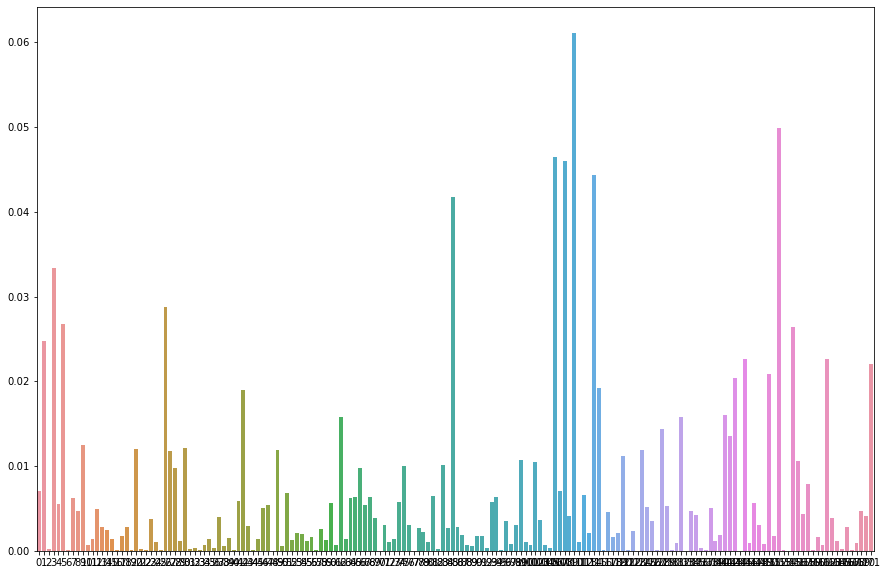

In [109]:
plt.figure(figsize = (15, 10))
sns.barplot(x = np.arange(data.shape[0]), y = CD)
plt.show()

#### 3-6) DFBETAS
- 각각의 Data를 제거시 포함시의 회귀 계수의 차이 
- 각 데이터(행별)로 표시됨
- 이상값 기준: 다른 행의 dfbeta 대비 얼마나 커야하는가?
- 기준 값은 2 혹은 2/표본수의 제곱근

In [43]:
OLSInfluence(result).dfbetas 

array([[-0.07977171, -0.01945092, -0.02201326, -0.02009155,  0.0194871 ,
         0.11274822],
       [ 0.03240655,  0.10833553,  0.10517777,  0.1048544 , -0.1075797 ,
        -0.01236462],
       [-0.01926689, -0.00867595, -0.00857023, -0.00844238,  0.00861644,
         0.01830412],
       ...,
       [ 0.14301388,  0.08003157,  0.0789541 ,  0.07998145, -0.08017991,
        -0.0415146 ],
       [ 0.08158144, -0.02182097, -0.02352222, -0.02218922,  0.02151374,
         0.06001309],
       [-0.14264672, -0.01821846, -0.01605322, -0.0168151 ,  0.01921928,
        -0.12808157]])

#### 3-7) DFFITS

- i번째 관측치 제외 시 종속변수 예측치의 변화 정도
- 기준치는 2 * ((상수항을 포함한 변수의 수 + 1) / 표본의수)의 제곱근

In [51]:
OLSInfluence(result).dffits

(0     -0.206195
 1     -0.387308
 2      0.032418
 3     -0.449974
 4     -0.182581
          ...   
 167    0.018883
 168    0.072071
 169    0.167986
 170    0.156569
 171    0.365549
 Length: 172, dtype: float64,
 0.3735436838188142)

In [49]:
print(f'기준치는 {2 / np.sqrt(len(data.columns) / data.shape[0])}')

기준치는 8.743251365736


## 8. 벌점화 선택 기준 : 변수 선택 기준으로 사용되는 통계량

### 1) 수정된 결정계수

- 변수 개수 증가하면 자연히 결정계수도 증가
- 수정된 결정계수는 이러한 단점을 보완하고 변수 선택 가능.
- 수정된 결정계수 사용시 더 이상 변수를 추가할 필요가 없는 시점의 모형을 선택하게 된다.

### 2) Mallow's CP

- 최소자승법을 사용하여 추정된 회귀모형의 적합성 평가에 사용
- Cp값이 작고 p+상수(변수의 개수 + 상수)에 가까운 모형을 선택
1. Cp값이 p와 비슷한 경우 : 편향이 작고 우수한 모델
2. Cp값이 p보다 큰 경우 : 편향이 크고 추가적인 변수가 필요한 모델을 의미
3. Cp값이 p보다 작은 경우 : 분산의 증가폭보다 편향의 감소폭이 더 크며 필요 없는 변수가 모델에 있다는 것을 의미

In [65]:
for p in range(6 + 1) : # 상수항 포함 컬럼 6개
    print(p, (np.sum(np.square(result.resid)) / result.mse_resid) - (data.shape[0] - 2 * (p+1)))

0 -4.000000000000028
1 -2.0000000000000284
2 -2.842170943040401e-14
3 1.9999999999999716
4 3.9999999999999716
5 5.999999999999972
6 7.999999999999972


## 9. 변수변환

#### 로그변환, 제곱근변환 : 값이 작은 값으로 구성되어 있을 때 정규화
#### 지수변환, 제곱변환 : 값이 큰 값으로 구성되어 있을 때 정규화
#### 더미변수 생성 : 범주형 데이터를 원-핫 인코딩
#### Box-Cox 변환 : 정규분포를 만족하지 않는 변수를 정규화하기 위해 사용

In [66]:
from scipy.stats import boxcox

In [80]:
for c in add_feature :
    print(f'{c}의 왜도는 {data[c].skew()}')

constant의 왜도는 0
marketing_total의 왜도는 0.06821242836349523
facebook의 왜도는 0.05824871583429746
google_adwords의 왜도는 -0.048824381005008764
employees의 왜도는 -0.21447424461259335
twitter의 왜도는 0.8937278225138959


twitter에 box-cox 적용

In [90]:
pd.Series(boxcox(data['twitter'])[0]).skew()

-0.03271390863662779

## 10. 회귀분석 변수선택법 custom_function by 동욱

In [201]:
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

In [ ]:
import itertools 

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const'],k) :
	 각 변수 조합을 고려한 경우의수
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
	
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model

In [ ]:
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
	models.loc[i] = getBest(X=train_x, y=train_y,k=i)
toc = time.time()
print("Total elapsed time:",(toc-tic),"seconds.")ㅠ

In [ ]:
def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0]. "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X,columns.difference(['const']))+1):
    	Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1 :
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

Forward_best_model = forward_model(X=train_x, y=train_y)

In [ ]:
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
    	results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
    return best_model
    
def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
    	Backward_result = backward(X=train_x, y= train_y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
        	break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodel.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0]
    
Backward_best_model = backward_model(X=train_x, y= train_y)

In [ ]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        print('forward')
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X,y=y,predictors = predictors)
        if Backward_result["AIC"] < Forward_result["AIC"]
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors k != "const"]
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])